In [ ]:
import sys, os, json, re, copy

from importlib import reload
import os, sys, json, glob
import sys, os, random, xmltodict
import pandas as pd
import datetime
import re, datetime, fnmatch
from bs4 import BeautifulSoup as BS
import requests
from tqdm import tqdm

## Parler Videos:
Got this from here: https://projects.propublica.org/parler-capitol-videos/

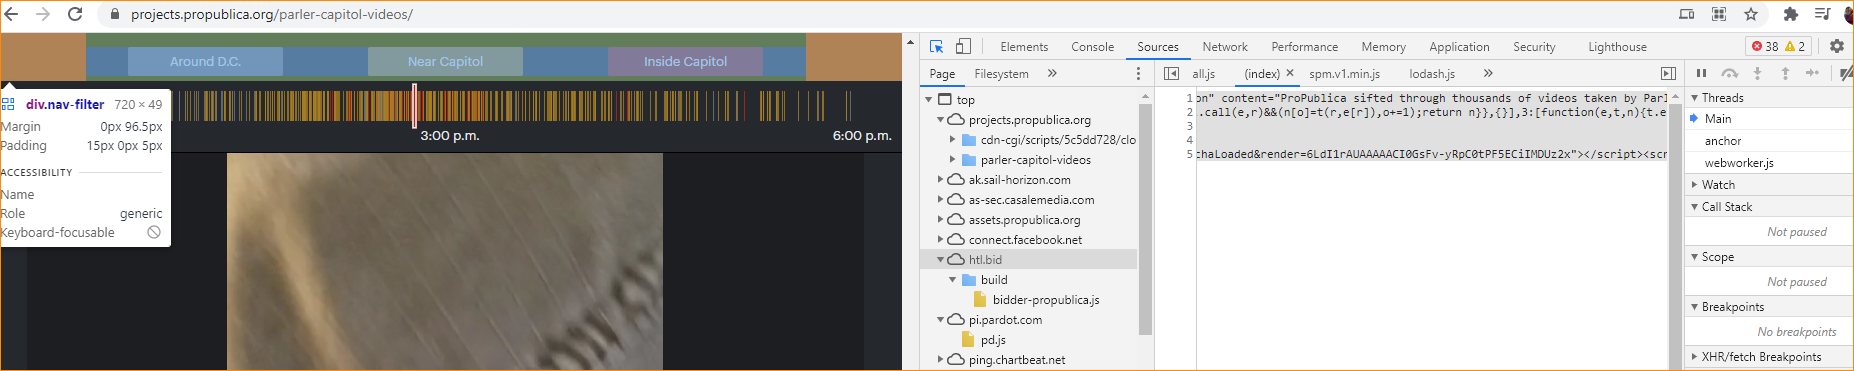


In [ ]:
inp =""

h=open('parlerData.html', 'r').read()
soup = BS(h)
t=soup.get_text()

In [ ]:
soup = BS(h)
lst=soup.find_all('videoz')
len(lst)
i=0
olst=[]
for rec in lst:
    j=dict(xmltodict.parse(str(rec))['videoz'].items())
    j['idx']=i
    olst.append(j)
    i+=1
    
with open('out_videoz.json', 'w') as f:
    f.write(json.dumps(olst, indent=4))

print(i)

In [ ]:
ud=''

with open('out_videoz.json', 'r') as f:
    jlst=json.loads(f.read())
    
failedLst=[]
for j in jlst:
    image_url = j['@data-src']
    opth = ud+image_url.split('/')[-1]
    if os.path.exists(opth):
        print('skipping: %i %s'%(i, opth))
    print(opth)
    
    # Streaming, so we can iterate over the response.
    response = requests.get(image_url, stream=True)
    total_size_in_bytes= int(response.headers.get('content-length', 0))
    
    block_size = 1024 #1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(opth, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, something went wrong", opth)
        failedLst.append(j)
    break